### COURSERA | IBM DATA SCIENCE | SUPPORT VECTOR MACHINE
The purpose of this program is to build and train a SVM (Support Vector Machine) model on human cell records in order to classify cell samples as either benign or malignant. <br>
This program uses human cell sample data from UCI Machine Learning Repository. 

Field       | Description
------------|------------
ID          | ID
Clump       | Clump thickness
UnifSize    | Uniformity of cell size
UnifShape   | Uniformity of cell shape
MargAdh     | Marginal adhesion
SingEpiSize | Single epithelial cell size
BareNuc     | Bare nuclei
BlandChrom  | Bland chromatin
NormNucl    | Normal nucleoli
Mit         | Mitosis
Class       | Benign or malignant

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline 

#### PART 1: DOWNLOAD & CLEAN CELL DATA

In [2]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2019-10-29 02:27:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.002s  

2019-10-29 02:27:21 (10.8 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [3]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


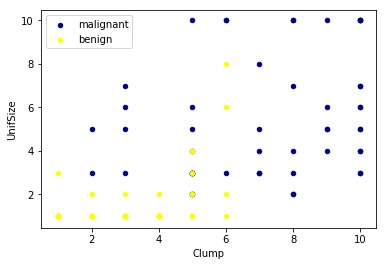

In [4]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

#### PART 2: DATA PRE-PROCESSING & SELECTION

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [6]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [8]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train Set:', x_train.shape, y_train.shape)
print ('Test Set:', x_test.shape, y_test.shape)

Train Set: (546, 9) (546,)
Test Set: (137, 9) (137,)


#### PART 3: SVM MODELING

In [10]:
from sklearn import svm

In [11]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([2, 4, 2, 4, 2])

#### PART 4: SVM MODEL EVALUATION

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
import itertools

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Unnormalized Confusion Matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [14]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Unnormalized Confusion Matrix
[[85  5]
 [ 0 47]]


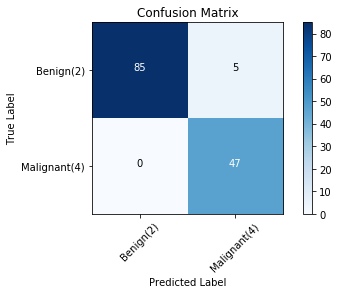

In [15]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize= False, title='Confusion Matrix')

In [16]:
score = f1_score(y_test, yhat, average='weighted')
jaccard_score = jaccard_similarity_score(y_test, yhat)
print('F1-Score: {}\nJaccard Score: {}'.format(score, jaccard_score))

F1-Score: 0.9639038982104676
Jaccard Score: 0.9635036496350365


In [17]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train, y_train)
yhat2 = clf2.predict(x_test)

score = f1_score(y_test, yhat2, average='weighted')
jaccard_score = jaccard_similarity_score(y_test, yhat2)
print('F1-Score: {}\nJaccard Score: {}'.format(score, jaccard_score))

F1-Score: 0.9639038982104676
Jaccard Score: 0.9635036496350365
